In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from sklearn.manifold import TSNE

from src.dataset import id2label, load_processed_dataset
from src.feature_extractor import wav2vec2
from src.models import fit_model, save_model

waveforms, list_label_str, list_label_id = load_processed_dataset()

/home/slime/Workspace/Vietnamese-Alphabet-Pronunciation/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/slime/Workspace/Vietnamese-Alphabet-Pronunciation/.venv/lib/python3.10/site-packages/transformers/configuration_utils.py:311: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [2]:
feature_vectors = wav2vec2(waveforms)
feature_vectors.shape, list_label_str.shape, list_label_id.shape

(torch.Size([141, 512]), (141,), (141,))

Iteration 1, loss = 2.09808286
Validation score: 0.000000
Iteration 2, loss = 1.89042354
Validation score: 0.333333
Iteration 3, loss = 1.66144388
Validation score: 0.333333
Iteration 4, loss = 1.36754122
Validation score: 0.400000
Iteration 5, loss = 1.11733056
Validation score: 0.333333
Iteration 6, loss = 0.90675212
Validation score: 0.466667
Iteration 7, loss = 0.70926353
Validation score: 0.533333
Iteration 8, loss = 0.58336489
Validation score: 0.600000
Iteration 9, loss = 0.45370197
Validation score: 0.600000
Iteration 10, loss = 0.46388189
Validation score: 0.666667
Iteration 11, loss = 0.37767840
Validation score: 0.600000
Iteration 12, loss = 0.48110192
Validation score: 0.533333
Iteration 13, loss = 0.39146785
Validation score: 0.466667
Iteration 14, loss = 0.36980167
Validation score: 0.666667
Iteration 15, loss = 0.32771233
Validation score: 0.466667
Iteration 16, loss = 0.26952491
Validation score: 0.600000
Iteration 17, loss = 0.17720539
Validation score: 0.666667
Iterat

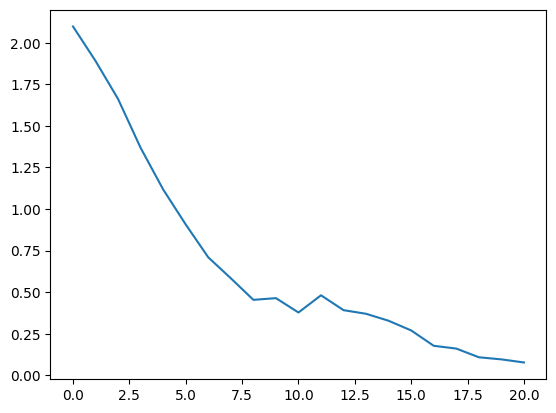

In [3]:
model = fit_model(feature_vectors, list_label_id)
plt.plot(model.loss_curve_)
print("Training set score: %f" % model.score(feature_vectors, list_label_id))

In [4]:
save_model(model)
model.score(feature_vectors, list_label_id)


0.8794326241134752

In [9]:
from src.models import predict_score

idx = 1
proba = model.predict_proba(feature_vectors[idx : idx + 1])
predicted_label_id = model.predict(feature_vectors[idx : idx + 1])[0]

print(f"Sample #{idx}")
print(f"Actual Label: {list_label_id[idx]} ({list_label_str[idx]})")
print(
    f"Predicted label: {predicted_label_id} ({id2label(predicted_label_id)})",
)
print("Predicted proba:", proba)
print("Proba for actual label:", proba[:, list_label_id[idx]])
print("Score:", predict_score(model, waveforms[idx], list_label_str[idx]))

Sample #1
Actual Label: 4 (N)
Predicted label: 4 (N)
Predicted proba: [[3.05571087e-04 2.70023720e-04 1.47447070e-03 4.70415236e-02
  9.26083250e-01 2.33937260e-02 1.27298705e-03 1.58448253e-04]]
Proba for actual label: [0.92608325]
Score: 4.704332998252207


In [10]:
import plotly.express as px

model = TSNE(
    n_components=3,
    perplexity=10,
    metric="cosine",
    max_iter=2000,
    method="exact",
    verbose=2,
).fit_transform(feature_vectors)

fig = px.scatter_3d(model, x=0, y=1, z=2, color=list_label_id)
fig.show()

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 141 / 141
[t-SNE] Mean sigma: 0.104812
[t-SNE] Iteration 50: error = 69.4989775, gradient norm = 0.2790276 (50 iterations in 0.077s)
[t-SNE] Iteration 100: error = 81.6359127, gradient norm = 0.2648105 (50 iterations in 0.064s)
[t-SNE] Iteration 150: error = 91.1599101, gradient norm = 0.1700903 (50 iterations in 0.054s)
[t-SNE] Iteration 200: error = 92.3997115, gradient norm = 0.2400999 (50 iterations in 0.056s)
[t-SNE] Iteration 250: error = 96.9400885, gradient norm = 0.1665750 (50 iterations in 0.053s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.940089
[t-SNE] Iteration 300: error = 2.8044023, gradient norm = 0.0082455 (50 iterations in 0.053s)
[t-SNE] Iteration 350: error = 2.2420011, gradient norm = 0.0065206 (50 iterations in 0.052s)
[t-SNE] Iteration 400: error = 1.9002042, gradient norm = 0.0073766 (50 iterations in 0.053s)
[t-SNE] Iteration 450: error = 1.

In [ ]:
feature_vectors.max(), feature_vectors.min()